# About The Dataset
The original source of the data is Australian Government's Bureau of Meteorology
 [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset you'll use in this project was downloaded from Kaggle at [https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download&select=weatherAUS.csv)  
Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)  

The dataset contains observations of weather metrics for each day from 2008 to 2017, and includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| :------------ | :---------------------------------------------------- | :-------------- | :----- |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged over 10 minutes prior to 9am  | Compass Points  | object |
| WindDir3pm    | Wind direction averaged over 10 minutes prior to 3pm  | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged over 10 minutes prior to 9am      | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged over 10 minutes prior to 3pm      | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was at least 1mm of rain today               | Yes/No          | object |
| RainTomorrow  | If there is at least 1mm of rain tomorrow             | Yes/No          | object |



In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from sklearn.pipeline import Pipeline
import seaborn as sns

## Load the data


Execute the following cells to load the dataset as a pandas dataframe.


In [42]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [43]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

Sunshine and cloud cover seem like important features, but they have a lot of missing values, far too many to impute their missing values.


### Drop all rows with missing values
To try to keep things simple we'll drop rows with missing values and see what's left


In [44]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p


Next


In [45]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [46]:
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })

In [47]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

In [48]:
df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Date'].apply(date_to_season)
df=df.drop(columns=['Date'])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,Summer
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,Summer
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,Summer
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,Summer
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,Winter
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,Winter
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,Winter
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,Winter


In [49]:
X = df.drop(columns=['RainToday'])
y = df['RainToday']

In [50]:
y.value_counts()

RainToday
No     43993
Yes    12427
Name: count, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [52]:
numeric_features = X_train.select_dtypes(include=['float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object','category']).columns.tolist()

In [53]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [54]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [55]:
# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear', penalty='l2', class_weight=None)
model.fit(X_train_processed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [56]:
param_grid = {
    'solver' : ['liblinear'],
    'penalty': ['l1', 'l2'],
    'class_weight' : [None, 'balanced']
}

In [57]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [58]:
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', verbose=2)
grid_search.fit(X_train_processed, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....class_weight=None, penalty=l1, solver=liblinear; total time=   3.7s
[CV] END ....class_weight=None, penalty=l1, solver=liblinear; total time=   6.0s
[CV] END ....class_weight=None, penalty=l1, solver=liblinear; total time=   4.3s
[CV] END ....class_weight=None, penalty=l1, solver=liblinear; total time=   3.8s
[CV] END ....class_weight=None, penalty=l1, solver=liblinear; total time=   3.7s
[CV] END ....class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END class_weight=balanced, penalty=l1, solver=liblinear; total time=   1.6s
[CV] END class_weight=balanced, penalty=l1, solve

,estimator,LogisticRegre...r='liblinear')
,param_grid,"{'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [59]:
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.86


In [60]:
test_score = grid_search.score(X_test_processed, y_test)
print("Test set score: {:.2f}".format(test_score))

Test set score: 0.86


In [61]:
y_pred = grid_search.predict(X_test_processed)

In [ ]:
   print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.94      0.91      8799
         Yes       0.73      0.55      0.62      2485

    accuracy                           0.86     11284
   macro avg       0.80      0.75      0.77     11284
weighted avg       0.85      0.86      0.85     11284



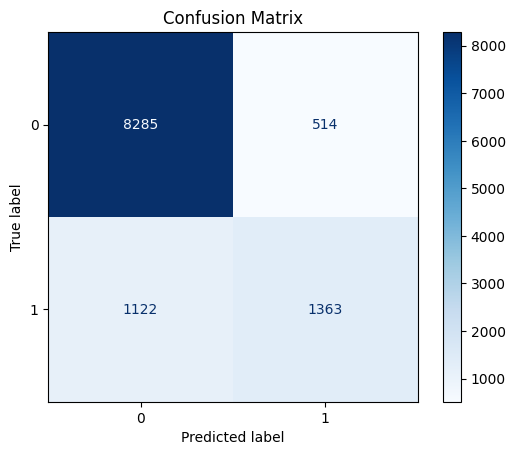

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [64]:
feature_importances = grid_search.best_estimator_.coef_[0]

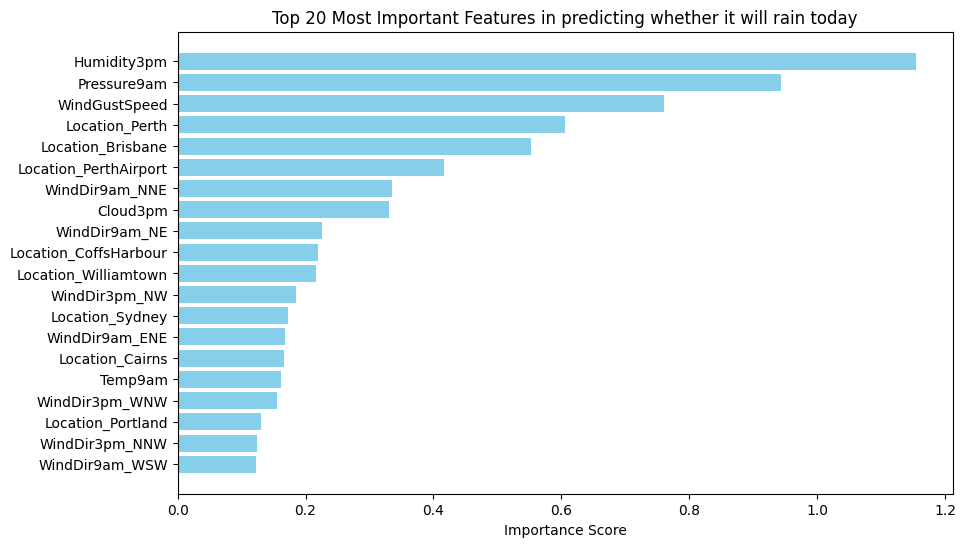

In [65]:
feature_names = numeric_features + list(preprocessor
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

feature_importances = grid_search.best_estimator_.coef_[0]

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

N = 20
top_features = importance_df.head(N)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()

In [66]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf)])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt'],
    'classifier__criterion': ['gini']
}

# Quick grid size calc (optional)
from functools import reduce
from operator import mul
grid_size = reduce(mul, [len(v) for v in param_grid.values()], 1)
print("Total parameter combinations:", grid_size)

Total parameter combinations: 16


In [69]:
grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Best CV score:", grid.best_score_)
print("Best params:", grid.best_params_)
best_pipeline = grid.best_estimator_


Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\gauta\Downloads\Machine Learning\ML\venv\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best CV score: nan
Best params: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [70]:
y_pred = best_pipeline.predict(X_test)
# If probabilities exist, get the column for class 'Yes'
y_proba = None
if hasattr(best_pipeline, "predict_proba"):
    clf = best_pipeline.named_steps['classifier']
    try:
        pos_idx = list(clf.classes_).index('Yes')
        y_proba = best_pipeline.predict_proba(X_test)[:, pos_idx]
    except Exception:
        y_proba = best_pipeline.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision (pos_label='Yes'):", precision_score(y_test, y_pred, pos_label='Yes', zero_division=0))
print("Test Recall (pos_label='Yes'):", recall_score(y_test, y_pred, pos_label='Yes', zero_division=0))
print("Test F1 (pos_label='Yes'):", f1_score(y_test, y_pred, pos_label='Yes', zero_division=0))
if y_proba is not None:
    try:
        print("Test ROC AUC:", roc_auc_score(y_test.map({'No':0,'Yes':1}) if hasattr(y_test,'map') else y_test, y_proba))
    except Exception:
        pass

# Explicit confusion matrix with label order ['No','Yes']
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4, target_names=['No','Yes']))

Test Accuracy: 0.8625487415809997
Test Precision (pos_label='Yes'): 0.7783075089392133
Test Recall (pos_label='Yes'): 0.5255533199195171
Test F1 (pos_label='Yes'): 0.6274321402834494
Test ROC AUC: 0.8964215569585259

Classification Report:
               precision    recall  f1-score   support

          No     0.8773    0.9577    0.9157      8799
         Yes     0.7783    0.5256    0.6274      2485

    accuracy                         0.8625     11284
   macro avg     0.8278    0.7416    0.7716     11284
weighted avg     0.8555    0.8625    0.8522     11284



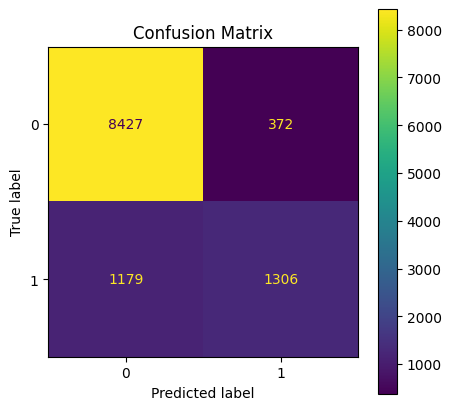

In [71]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, values_format='d')
ax.set_title("Confusion Matrix")
plt.show()

Recovered feature names via pre.get_feature_names_out()


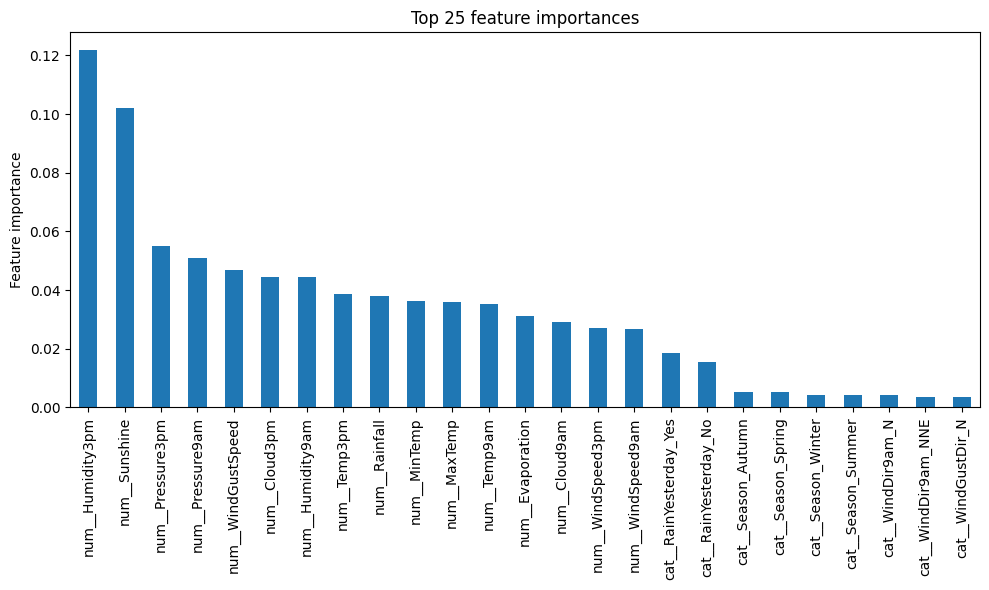

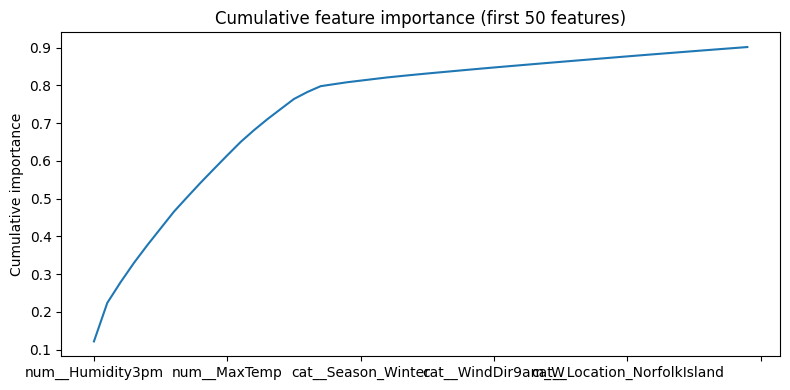

Top features:


num__Humidity3pm          0.121787
num__Sunshine             0.102086
num__Pressure3pm          0.054962
num__Pressure9am          0.051022
num__WindGustSpeed        0.046842
num__Cloud3pm             0.044535
num__Humidity9am          0.044473
num__Temp3pm              0.038646
num__Rainfall             0.038085
num__MinTemp              0.036411
num__MaxTemp              0.036086
num__Temp9am              0.035362
num__Evaporation          0.031199
num__Cloud9am             0.028956
num__WindSpeed3pm         0.026991
num__WindSpeed9am         0.026754
cat__RainYesterday_Yes    0.018403
cat__RainYesterday_No     0.015522
cat__Season_Autumn        0.005308
cat__Season_Spring        0.005176
cat__Season_Winter        0.004261
cat__Season_Summer        0.004258
cat__WindDir9am_N         0.004211
cat__WindDir9am_NNE       0.003564
cat__WindGustDir_N        0.003486
dtype: float64

In [72]:
pre = best_pipeline.named_steps.get('preprocessor', None)
clf = best_pipeline.named_steps.get('classifier', None)

if pre is None or clf is None:
    raise RuntimeError("best_pipeline must contain 'preprocessor' and 'classifier' steps.")

feature_names = []

# Try the modern API first (sklearn >= ~1.0)
try:
    # ColumnTransformer often implements get_feature_names_out in recent sklearn versions
    if hasattr(pre, "get_feature_names_out"):
        try:
            fn = pre.get_feature_names_out()
            feature_names = list(fn)
            print("Recovered feature names via pre.get_feature_names_out()")
        except Exception as e:
            # fall through to manual method
            print("pre.get_feature_names_out() exists but failed:", e)
            feature_names = []
except Exception:
    feature_names = []

# If we don't have names yet, build them manually from pre.transformers_
if len(feature_names) == 0:
    try:
        # pre.transformers_ exists only after fitting; it's a list of (name, transformer, columns)
        transformers = pre.transformers_
    except AttributeError:
        transformers = None

    if transformers is None:
        print("ColumnTransformer does not expose .transformers_. It may not be fitted or is a different object.")
    else:
        # iterate through fitted transformers
        for name, trans, cols in transformers:
            if trans == "drop" or trans is None:
                # dropped columns produce no features
                continue
            if trans == "passthrough":
                # passthrough columns appear as-is
                if cols is None:
                    # in some sklearn versions 'cols' can be a slice or list-like; skip if unknown
                    continue
                feature_names.extend(list(cols))
                continue

            # If transformer is a Pipeline, get the final fitted estimator inside it
            transformer = trans
            last_step = None
            if hasattr(trans, "named_steps"):
                # Pipeline: extract the final transformer (e.g., OneHotEncoder inside pipeline)
                # The Pipeline object we get from .transformers_ is the fitted pipeline instance.
                try:
                    # get last step object
                    last_step = list(trans.named_steps.values())[-1]
                except Exception:
                    last_step = trans
            else:
                last_step = trans

            # Now try to extract feature names from the fitted last_step
            extracted = []
            try:
                # If the transformer has get_feature_names_out, use it (needs input feature names)
                if hasattr(last_step, "get_feature_names_out"):
                    # last_step.get_feature_names_out expects the input feature names for that transformer
                    # cols might be array of input feature names; pass them when possible.
                    try:
                        out_names = last_step.get_feature_names_out(cols)
                    except Exception:
                        # some versions expect no args
                        out_names = last_step.get_feature_names_out()
                    extracted = list(out_names)
                    # Append them
                    feature_names.extend(extracted)
                    continue
            except Exception:
                pass

            # If it's a OneHotEncoder-like object with categories_ attribute, build names manually
            if hasattr(last_step, "categories_"):
                # 'cols' should be the list of input column names corresponding to categories_
                try:
                    for c_name, cats in zip(cols, last_step.categories_):
                        for cat in cats:
                            feature_names.append(f"{c_name}_{cat}")
                    continue
                except Exception:
                    # fallback below
                    pass

            # If the transformer is a scaler/imputer etc. that returns same number of columns as input:
            # just use the original input column names
            try:
                if isinstance(cols, (list, tuple, np.ndarray)):
                    feature_names.extend(list(cols))
                    continue
            except Exception:
                pass

        # end for transformers

# Final sanity checks
if len(feature_names) == 0:
    print("WARNING: Could not recover feature names from preprocessor. Falling back to positional indices.")
    n_features = clf.n_features_in_ if hasattr(clf, "n_features_in_") else None
    if n_features is None:
        # last resort: try to inspect classifier's feature_importances_ length
        try:
            n_features = len(clf.feature_importances_)
        except Exception:
            n_features = None

    if n_features is not None:
        feature_names = [f"feat_{i}" for i in range(n_features)]
        print(f"Created {len(feature_names)} generic feature names.")
    else:
        raise RuntimeError("Can't determine number of features for fallback naming. Stop.")

# Now attempt to match number of importances
importances = None
try:
    importances = clf.feature_importances_
except Exception as e:
    raise RuntimeError("Classifier has no attribute feature_importances_. Was it a RandomForest? Error: " + str(e))

if len(importances) != len(feature_names):
    print(f"Length mismatch: classifier has {len(importances)} importances but we recovered {len(feature_names)} feature names.")
    # Try attempting to transform a single row to compute actual feature count after preprocessing
    try:
        sample = X_test.iloc[[0]] if hasattr(X_test, "iloc") else None
        if sample is not None:
            sample_trans = pre.transform(sample)
            n_after = sample_trans.shape[1]
            if n_after == len(importances):
                # regenerate generic names with length n_after
                feature_names = [f"feat_{i}" for i in range(n_after)]
                print("Replaced feature names with generic names matching transformed feature count.")
            else:
                print(f"Preprocessor transforms a sample to {n_after} features (importances length {len(importances)}). Using generic names of that length.")
                feature_names = [f"feat_{i}" for i in range(len(importances))]
        else:
            # fallback
            feature_names = [f"feat_{i}" for i in range(len(importances))]
    except Exception as e:
        print("Error during fallback transform:", e)
        feature_names = [f"feat_{i}" for i in range(len(importances))]

# Build a pandas Series for importances and plot
fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top-k importances
top_k = min(25, len(fi))
fig, ax = plt.subplots(figsize=(10, 6))
fi.head(top_k).plot.bar(ax=ax)
ax.set_ylabel("Feature importance")
ax.set_title(f"Top {top_k} feature importances")
plt.tight_layout()
plt.show()

# Cumulative importance
fig, ax = plt.subplots(figsize=(8, 4))
(fi.cumsum().head(50)).plot(ax=ax)
ax.set_ylabel("Cumulative importance")
ax.set_title("Cumulative feature importance (first 50 features)")
plt.tight_layout()
plt.show()

# Print top features as a table
print("Top features:")
display(fi.head(top_k))

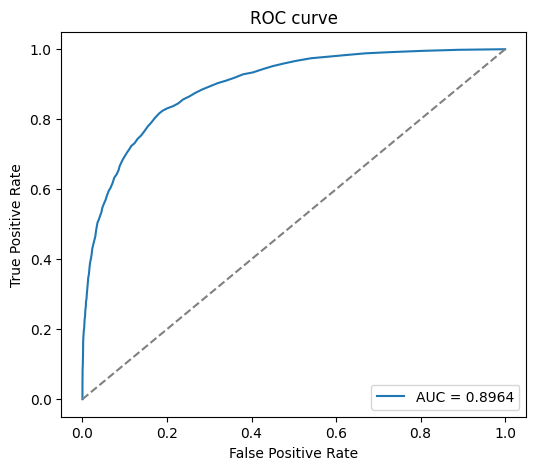

In [73]:
y_pred_raw = best_pipeline.predict(X_test)
clf = best_pipeline.named_steps['classifier']

# 2) ensure y_test and y_pred are pandas Series (aligned)
y_test_s = pd.Series(y_test).reset_index(drop=True)
y_pred_s = pd.Series(y_pred_raw).reset_index(drop=True)

# 3) mapping to numeric 0/1 (preferred)
if set(['Yes','No']).issubset(set(y_test_s.unique())):
    map_to_num = {'No': 0, 'Yes': 1}
else:
    # fallback: if already numeric 0/1 pass-through; if strings of other labels map deterministically
    uniq = list(y_test_s.unique())
    if all(isinstance(v, (int, np.integer)) for v in uniq) and set(uniq).issubset({0,1}):
        # already numeric 0/1
        map_to_num = None
    else:
        if len(uniq) != 2:
            raise ValueError(f"Expected binary labels but found: {uniq}")
        # map first->0 second->1 (deterministic)
        map_to_num = {uniq[0]: 0, uniq[1]: 1}

if map_to_num is not None:
    y_test_num = y_test_s.map(map_to_num).astype(int).values
    y_pred_num = y_pred_s.map(map_to_num).astype(int).values
else:
    y_test_num = y_test_s.astype(int).values
    y_pred_num = y_pred_s.astype(int).values

# 4) get predicted probabilities for positive class robustly (string or numeric training)
y_proba = None
if hasattr(best_pipeline, "predict_proba"):
    # determine positive label string if mapping exists
    positive_label_str = None
    if map_to_num is not None:
        # find string label mapped to 1
        for k,v in map_to_num.items():
            if v == 1:
                positive_label_str = k
                break
    # find index in classifier.classes_
    try:
        if positive_label_str is not None:
            pos_idx = list(clf.classes_).index(positive_label_str)
        else:
            # if training used numeric labels, find which class equals 1
            pos_idx = list(clf.classes_).index(1) if 1 in list(clf.classes_) else 1
    except Exception:
        pos_idx = 1  # fallback
    try:
        y_proba = best_pipeline.predict_proba(X_test)[:, pos_idx]
    except Exception:
        # fallback: try second column
        try:
            y_proba = best_pipeline.predict_proba(X_test)[:, 1]
        except Exception:
            y_proba = None

# 6) ROC plotting using numeric labels
if y_proba is not None:
    try:
        fpr, tpr, _ = roc_curve(y_test_num, y_proba)
        auc = roc_auc_score(y_test_num, y_proba)
        fig, ax = plt.subplots(figsize=(6,5))
        ax.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
        ax.plot([0,1], [0,1], linestyle='--', color='gray')
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
        ax.set_title("ROC curve")
        ax.legend(loc='lower right')
        plt.show()
    except Exception as e:
        print("ROC plot error:", e)
